## Question 1

In [ ]:
import random

known_weather_data = {
    'berlin': 20.0
}

def get_weather(city: str) -> float:
    city = city.strip().lower()

    if city in known_weather_data:
        return known_weather_data[city]

    return round(random.uniform(-5, 35), 1)

In [ ]:
get_weather_tool = {
    "type": "function",
    "name": "get_weather",
    "description": "Retrieve the temperature for a given city.",
    "parameters": {
        "type": "object",
        "properties": {
            "city": {
                "type": "string",
                "description": "The name of the city to get the weather for."
            }
        },
        "required": ["city"],
        "additionalProperties": False
    }
}

## Question 2

In [ ]:
def set_weather(city: str, temp: float) -> None:
    city = city.strip().lower()
    known_weather_data[city] = temp
    return 'OK'

In [ ]:
set_weather_tool = {
    "type": "function",
    "name": "set_weather",
    "description": "Set the temperature for a specific city.",
    "parameters": {
        "type": "object",
        "properties": {
            "city": {
                "type": "string",
                "description": "The name of the city to set the temperature for."
            },
            "temp": {
                "type": "number",
                "description": "The temperature value to assign to the city."
            }
        },
        "required": ["city", "temp"],
        "additionalProperties": False
    }
}


## Question 3

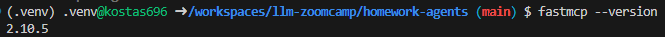

## Question 4

In [ ]:
def get_weather(city: str) -> float:
    """
    Retrieves the temperature for a specified city.

    Parameters:
        city (str): The name of the city for which to retrieve weather data.

    Returns:
        float: The temperature associated with the city.
    """
    city = city.strip().lower()

    if city in known_weather_data:
        return known_weather_data[city]

    return round(random.uniform(-5, 35), 1)


def set_weather(city: str, temp: float) -> None:
    """
    Sets the temperature for a specified city.

    Parameters:
        city (str): The name of the city for which to set the weather data.
        temp (float): The temperature to associate with the city.

    Returns:
        str: A confirmation string 'OK' indicating successful update.
    """
    city = city.strip().lower()
    known_weather_data[city] = temp
    return 'OK'

## Question 5

20

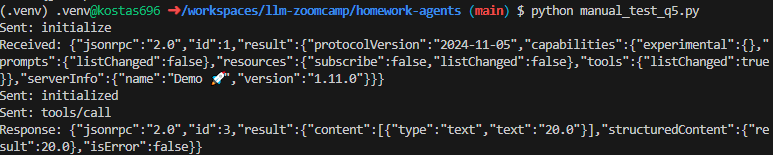

## Question 6

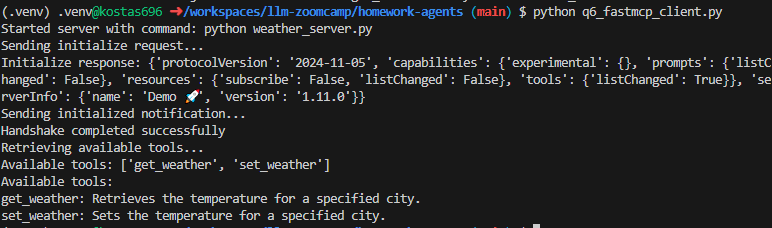

In [ ]:
# run_agent_with_phi.py

from dotenv import load_dotenv
from langchain_ollama import ChatOllama
import chat_assistant
import mcp_client

load_dotenv()

# Start MCP client and weather server
client = mcp_client.MCPClient(["python", "weather_server.py"])
client.start_server()
client.initialize()
client.initialized()

# Wrap MCP tools for LangChain-style agent use
tools = mcp_client.MCPTools(mcp_client=client)

# Set up Ollama (phi model)
llm = ChatOllama(model="phi", base_url="http://localhost:11434")

# Developer prompt to guide behavior
developer_prompt = """
You help users find out the weather in their cities using available tools. 
Always make sure the user provides a city. 
If they didn’t specify a city, ask them.
""".strip()

# UI + chat loop
chat_interface = chat_assistant.ChatInterface()

chat = chat_assistant.ChatAssistant(
    tools=tools,
    developer_prompt=developer_prompt,
    chat_interface=chat_interface,
    client=llm
)

# Run the agent loop
chat.run()

: 